#  **BioPolymer2D** class
BioPolymer2D is an object-oriented class based on MDAnalysis that is part of the `twodanalysis` toolkit package to analyze adsorption mechanisms of biopolymer into 2-dimentional surfaces. This toolkit is initialized with an MDAnalysis Universe or Atom Group, enabling the use of Universes and AtomGroups that have been previously initialized to be used for built-in MDAnalysis methods.

Functions that analyze flexibility (Polar histograms and 2D-density contours) make use of two important parameters to determine adsorbed frames to be analyzed:
* `zlim`: Sets the minimal distance (in $\text{\AA}$) residues need to have to the surface to be considered absorbed, e.i filters frames where $\langle z_i\rangle_{\text{residues}}$ > `zlim`.
* `Nframes` : Sets the number of frames to consider from the set of  $\langle z_i\rangle_{\text{residues}}$ < `zlim` frames. If `Nframes=None`, it considers all frames.

In this class, we propose four analysis functions that will focus on retrieving detailed information on the adsorption mechanisms of biopolymers onto 2-dimensional surfaces: 
1. **Polar Histogram analysis**:
Polar histogram of residues from the center of mass of a given selection of atoms. This type of analysis gives detailed information on the distribution of the positions of the residues over the simulations. These histograms can be interpreted as probability distribution histograms (PDF) of the residues, and therefore the width of the histogram is an indicative of the flexiblity of the residues. This analysis has been previously used in Supplementary information of [[1](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460)].

2. **2D-density contour analysis**:
Using the `seaborn.kde_plot` function, it makes a contour plot of selected residues using only a set of adsorpbed to the surface frames of the simulation, and is able to compute the areas of a given contour level. Similarly to the polar plot, the area of the contour plots can give information on the flexibility of the residue, but also give insight on the the specificity of the interactions depending on the chosen level of the contour plot that is selected to compute the area. 
Analogue to the Polar histograms, these KDE position density contours are 2-dimentional probability distribution histograms. Therefore, by measuring the area of diferent contour levels you can measure diferent properties if the interaction, for instance,
*  By computing th area of the lower contour levels, you can sample all the available spaces states in the X and Y axis which is an indicative of how flexible ("entropic") is the system, i.e., higher area values at the lowest contour levels shows more flexibility. 

* On the other hand, by computng the area of higher contour level, you can sample the available space state of the peak of the distribution, giving insight on the specificity of the interaction, i.e, lower area values at the highest contour levels show more specificity. 

3. **Parallel and perpendicular radii of gyration**:
Computes the standard 3D ($R_{g}$), parallel ($R_{g\parallel}$) and perpendicular ($R_{g\perp}$) radii of gyration.

$$R_{\textrm{g}}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2+(z_i-z_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\parallel}= \sqrt{ \frac{1}{m_T}\sum_{i} m_{i}\left[ (x_i-x_{\textrm{CM}})^2+(y_i-y_{\text{CM}})^2\right]}$$
$$R_{\textrm{g}\perp} = \sqrt{\frac{1}{m_T}\sum_{i} m_{i} (z_i-z_{\text{CM}})^2,}$$

where ${\bf R}_{\textrm{CM}}=(x_{\textrm{CM}}$, $y_{\textrm{CM}}$, $z_{\textrm{CM}})$ is the position of the center of mass, $m_{i}$ the mass of each residue and $m_T$ the total mass of the residues.

The parallel and perpendicular radii of gyration gives structural information during the adsorption,

* $R_{g\parallel}$: Gives information on how the biopolymer is expanded by the sides (parallel to the surface). 

* $R_{g\perp}$ : Gives information on how the biopolymer is streched or flattened.

and, if compared to native environment, it can give insight on the deformation of the biopolymer due to the surface presence, as was done in [[1](https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460)], where we compare these values for the open SARS-CoV2 RBD onto polarizable bilayers to its native ACE2 enzyme.

Note that $R_{g\parallel}$ and $R_{g\perp}$ are not necesarilly correlated since secondary strucutures as biomolecules have cavities. This is specilly true for proteins.

When these values are computed, there is the posibility to generate a plot indicating $\langle R_{g\perp}^2 \rangle /\langle R_{g\parallel}^2 \rangle$ ratio, which is relevant in polymer theory [[2](https://pubs.acs.org/doi/10.1021/acsomega.1c04774), [3](https://pubs.aip.org/aip/jcp/article-abstract/144/17/174902/194646/Semiflexible-polymers-under-good-solvent?redirectedFrom=fulltext), [4](https://pubs.aip.org/aip/jcp/article-abstract/152/6/064901/307769/How-does-stiffness-of-polymer-chains-affect-their?redirectedFrom=fulltext)] when studying polymer adsorption, and a $R_{g\perp}$ vs $R_{g\parallel}$ plot similar to Figure 1.

<div style="text-align: center;">
    <img src="images/TOC12_Final.png" width="600" alt="FIGURE 1" />
    <p><b>Figure 1:</b> Figure extracted from <a href="https://pubs.acs.org/doi/10.1021/acs.jcim.4c00460" target="_blank">[1]</a> 
    It shows a plot similar to the one generated by the toolbox, with some graphical representation of the 
    \( R_{g\parallel} \) and \( R_{g\perp} \) .</p>
</div>

4. **H-bonds per residues**:

In order to further understand the present interactions between surfaces and the biopolymer, this tool computes the Hbonds of each residue in a selection of residues during the simulation. As an output you will have a table sorted from the residues with most to the least Hbonds, and there is the posibitly to have a plot show the center of mass of the residues from a bottom perspective. This tool uses MDAnalysis protocol to compute Hbonds which is a geometric approach of Hbond computation, and uses MDAnalysis default parameters to compute them. 



## Instalation and previous setup

Prior starting with this tutorial, you must install the `twodanalysis` toolkit following th steps in [2Danalysis instalation guide](https://twodanalysis.readthedocs.io/en/latest/installation.) or the README.md file from the [2Danalysis Github](https://github.com/monjegroup/twod-analysis-kit). With the instalation of the toolkit, trajectories used in the tutorials will be downloaded. 

Import the `BioPolymer2D` class and the trajectories from the toolkit library, and other libraries required for the tutorial. 

# Case of study 3: Closed SARS-CoV2 RBD with glycans in highly hydrophilic surfaces with **BioPolymer2D** class

In [1]:
from twodanalysis import BioPolymer2D 
from twodanalysis.data.files import MD_NOWATER_TPR, MD_TRAJ
import MDAnalysis as mda
import matplotlib.pyplot as plt
import pandas as pd
import nglview as nv
# mpl.rcParams['figure.dpi'] = 1000

## System

In this tutorial, we will be using the BioPolymer2D class to analyze the adsorption mechanisms of a protein onto a surface. In this case, we will be using the closed SARS-CoV2 RBD with glycans, where we will be able to compare flexibility of Glycans vs flexbility of protein. It is expected glycans to be more flexible than proteins since proteins have secondary structures that reduces the degrees of freedom of the atoms, and glycans are attached to the protein merly by one covalent bond.

In Figure 2,  we can see our system that is given by the SARS-CoV2 RBD in black, the glycan in red and the polarizable bilayer (PBL) in yellow (uncomment cell below to see this image with more detail). 

<div style="text-align: center;">
    <img src="images/System.png" width="400" alt="FIGURE 2" />
    <p><b>Figure 2:</b> System that with be used for the tutorial. SARS-CoV2 RBD is shown in black, the glycan in red and the polarizable bilayer (PBL) in yellow . </p>
</div>


In [2]:
# u=mda.Universe(MD_NOWATER_TPR,MD_TRAJ)
# sel = u.select_atoms("resid 193-200 or protein")
# view=nv.show_mdanalysis(u)
# # Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# # Selection of molecules in protein
# prot = u.select_atoms("protein")
# # Selection of molecules in Glycan
# glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow',)# opacity=0.5, probeRadius=2)
# view.add_representation('cartoon', selection=prot.atoms.indices,color='black')
# view.add_representation('licorice', selection=glyc.atoms.indices,color='red', radius=0.5)

# view.layout.width = '500px'  # Set the width
# view.layout.height = '400px'  # Set the height

# view.center()
# # Display the view
# view

Although, the whole trajectory can be seen in the latter output, it is not recommended since reproduction will be slow. In such case you want to see the whole trajectory, uncomment cell below.

In [3]:

### Uncomment if you want to see the trajectory
# t = nv.MDAnalysisTrajectory(u.select_atoms('protein or resname DOL or resname AFUC BMAN AMAN BGLCNA'))
# w = nv.NGLWidget(t)
# w

## Initializing object

We first initialize a Universe or AtomGroup.

In [4]:
u=mda.Universe(MD_NOWATER_TPR,MD_TRAJ)
sel = u.select_atoms("resid 193-200 or protein")

Now, that we have initialized a Universe or an AtomGroup, we will initialize our BioPolymer2D object. This can be initialized either with a MDAnalysis AtomGroup or a Universe. The class has two main attributes, universe and atom_group. If initialized with a Universe, the attribute atom_group will be the AtomGroup of the whole system. For instance:

In [5]:
ag_biopol = BioPolymer2D(u)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 24616
  N selected residues: 853
  N selected segments: 3


Note that Selection info has the same number of atoms and residues that Universe info.

If the class is initialized with a selection, we will get different selection with the Universe:

In [6]:
ag_biopol = BioPolymer2D(sel)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


Whether you initialize with a Universe or AtomGroup, you can set your BioPolymer to be a subset residues of these by using the `biopol_selection` input

In [7]:
ag_biopol = BioPolymer2D(sel,'protein')
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 3035
  N selected residues: 192
  N selected segments: 1


In the previous cases, our object has no information on the positioning of  **interface** of the surface. This can be set by setting a 4 element numpy array [0,x,y,z], 

In [8]:
ag_biopol.surf_pos = [0,41,36,26]

or using the `surf_selection` input in the intialization of the object to select the *interfatial* atoms of the surface,

In [9]:
ag_biopol = BioPolymer2D(sel,'protein', surf_selection='resname DOL and name O1 and prop z > 16')
ag_biopol.INFO()

Getting positions from frame 0 to 300 with steps of 1
 Mean position of the surface is [149.5         41.72882669  36.97127891  26.97194334]
=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 0.0-300.0ns dt=1.0ns
  N frames : 300
=== SELECTION INFO ===
  N selected atoms: 3035
  N selected residues: 192
  N selected segments: 1


 ***This is the most recommended approach.***

Note that only oxigen atoms with z-positioning > 16$\text\AA$ on the surface ('resname DOL') are taken into account as interfatial atoms, rather than the whole surface residue. By using this approach, the mean value over time and interfacial atoms will be considered as the position of the surface. 

Also, when initializing the object, one can choose to only use a set of the total frames in the trajectory by changing the values of `start`, `step` and/or `end`. These 3 parameters can be selected times (in ns) or frames, by setting the parameter `by_frame` to False or True, correspondingly. Default is by frames. 

Note above that steps in trajectory of this tutorial are steps of 1ns per frames, so the difference between setting `by_frames` to True or False, will not be noted. 

In [10]:
ag_biopol = BioPolymer2D(sel,surf_selection='resname DOL and name O1 and prop z > 16', start=100,step=2,end=300,by_frames=False)
ag_biopol.INFO()

Getting positions from frame 100 to 300 with steps of 2
 Mean position of the surface is [199.          41.72931059  36.97296236  26.96406497]
=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 100-300ns dt=2ns
  N frames : 100
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


In [11]:
ag_biopol = BioPolymer2D(sel,start=200,step=3,end=300,by_frames=True)
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 200.0-300.0ns dt=3.0ns
  N frames : 34
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


In [12]:
print(ag_biopol.startT,ag_biopol.stepT,ag_biopol.endT)
print(ag_biopol.startF,ag_biopol.stepF,ag_biopol.endF)

200.0 3.0 300.0
200 3 300


This can be changed 'on-the-fly' by overloading these attributes `startT`, `stepT` and/or `endT` for changes in the time, or `startF`, `stepF` and/or `endF` for changes in frames, as follows:

In [13]:
ag_biopol.startF=200
ag_biopol.endF=300
ag_biopol.stepF=4
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 200.0-300.0ns dt=4.0ns
  N frames : 25
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


In [14]:
ag_biopol.startT=100
ag_biopol.endT=200
ag_biopol.stepT=4
ag_biopol.INFO()

=== UNIVERSE INFO ===
  N atoms: 24616
  N residues: 853
  N segments: 3
  Time : 100-200ns dt=4ns
  N frames : 25
=== SELECTION INFO ===
  N selected atoms: 3227
  N selected residues: 200
  N selected segments: 1


**WARNING**: If `stepT` is smaller than initial Universe, you will have problems during the analysis calculations. 

If we now compute the positions of the residues with:

In [15]:
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

Getting positions from frame 100 to 200 with steps of 4
100 200


(25, 200, 4)

We get a numpy array of size (`ag_biopol.endF` -`ag_biopol.startF`, `Nresidues` ,`pos` \<t,x,y,z\> ). If we want to compute the positions of atoms instead of the center of mass of residues, you can get use:

In [16]:
ag_biopol.getPositions(pos_type='all')
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

Getting positions from frame 100 to 200 with steps of 4
100 200


(25, 3227, 4)

Note that the calculation of `getPosition` will be a typical first step after initializing the object. It has not added as a default calculation when initialize to be able to customize this calculations as previouly mentioned and give the liberty to assign positions to the object if they were previously computed, although this must be done very carefully to consitently set other attributed of the object. 

The`getPositions` method that by default will store the positions in place in the object attribute `self.pos`:

In [17]:

ag_biopol = BioPolymer2D(sel)
ag_biopol.system_name='Omicron PBL1'
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

Getting positions from frame 0 to 300 with steps of 1
0 300


(300, 200, 4)

Attribute `system_name` is simply to set the name of the system. This will be usefull for doing legends and title during the analysis plots if there is more than one system to be analyzed.

If we do not want to store the positions as an attribute of the object, we can simply set `inplace=False`. This way we could use this function to compute the positions of any selection of the universe without overwriting the `self.pos` attribute of the object. For instance:

In [18]:
glycan_extreme_residues_pos=ag_biopol.getPositions(select='resid 198 200', inplace=False)
print(glycan_extreme_residues_pos.shape, "residues computes with inplace=False")
print(ag_biopol.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 300 with steps of 1
(300, 2, 4) residues computes with inplace=False
(300, 200, 4) residues computes with inplace=True


Or even compute the positions of all atoms:

In [19]:
all_atoms_pos=ag_biopol.getPositions(select='resid 198 200', inplace=False)
print(all_atoms_pos.shape, "residues computes with inplace=False")
print(ag_biopol.pos.shape, "residues computes with inplace=True")

Getting positions from frame 0 to 300 with steps of 1
(300, 2, 4) residues computes with inplace=False
(300, 200, 4) residues computes with inplace=True


## Polar Analysis 

Now we will reinitialize our object and compute the positions of the selection to compute the **polar histograms of residues** by using our previously selected residues (all residues in the protein+glycan), and we will call the system "Omicron PBL1", since we are working with the Omicron variant of the SARS-COV2 RBD with a PBL of polarity 1 (completly hydrophilic).

In [20]:

ag_biopol = BioPolymer2D(sel,surf_selection='resname DOL and name O1 and prop z > 16')
ag_biopol.system_name='Omicron PBL1'
ag_biopol.getPositions()
print(ag_biopol.startF,ag_biopol.endF)
ag_biopol.pos.shape

Getting positions from frame 0 to 300 with steps of 1
 Mean position of the surface is [149.5         41.72882669  36.97127891  26.97194334]
Getting positions from frame 0 to 300 with steps of 1
0 300


(300, 200, 4)

Now that we have computed the positions, we can start our analysis using the `PolarAnalysis` method. The Polar analysis method will take the object's selection to set the center of the polar histogram, and plot the histograms selected in `select_res` parameter. In the following case, we will take seven protein residues in the contact region and compare their histogram width with two glycan residues (198-BGLCNA and 200-BGLCNA). Reference of the positioning of these residues below with residue colors corresponding with the Polar histograms and the KDE Analysis (next section).

**Note:** Positioning of residues in Polar histograms (and 2D-density contours) correspond to a *top view* of the structure.   

In [26]:

view=nv.show_mdanalysis(u)
# Selection of molecules in Polariable Bilayer (PBL)
# resname_dol = u.select_atoms("resname DOL")
# Selection of molecules in protein
prot = u.select_atoms("protein")
# Selection of molecules in Glycan
glyc = u.select_atoms("resname BGLCNA AFUC BMAN AMAN")
# Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
view.clear_representations()
# view.add_representation('surface', selection=resname_dol.atoms.indices,color='yellow', opacity=0.9, probeRadius=2)
view.add_representation('cartoon', selection=prot.atoms.indices,color='darkgray',opacity=0.3, smoothness=30,smoothSheet=True)
view.add_representation('licorice', selection=glyc.atoms.indices,color='darkgray', radius=0.5,opacity=0.3)

residues=[8, 12,40,45,111,115,173,198,200]
colors=['blue', 'orange', 'lightgreen', 'red', 'purple','brown', 'pink','gray','darkgreen']
for c,r in zip(colors,residues):
    res = u.select_atoms(f"resid {r} and (name CA or name C5)")
    view.add_representation('ball+stick', selection=res.atoms.indices,color=c, radiusScale=5)

view.layout.width = '500px'  # Set the width
view.layout.height = '400px'  # Set the height

view.center()
# Display the view
view

NGLWidget(layout=Layout(height='400px', width='500px'), max_frame=300)

Computing Polar Analysis from frame 0 (t=0.0ns) to 300 (t=300.0ns) 
Getting positions from frame 0 to 300 with steps of 1
<ResidueGroup [<Residue ASP, 8>, <Residue ASN, 12>, <Residue LEU, 40>, <Residue THR, 45>, <Residue ASP, 111>, <Residue SER, 115>, <Residue GLY, 173>, <Residue BGLCNA, 198>, <Residue BGLCNA, 200>]>
(300, 9, 4)
[149.5         43.23445015  32.82221713  16.33342782] pos mean
[149.5          0.82834611  -3.73746055  16.33342782] pos centered
(300,)
There are 289  frames < 15 A in Z
(289, 9, 4)
(9, 4) MeanPos


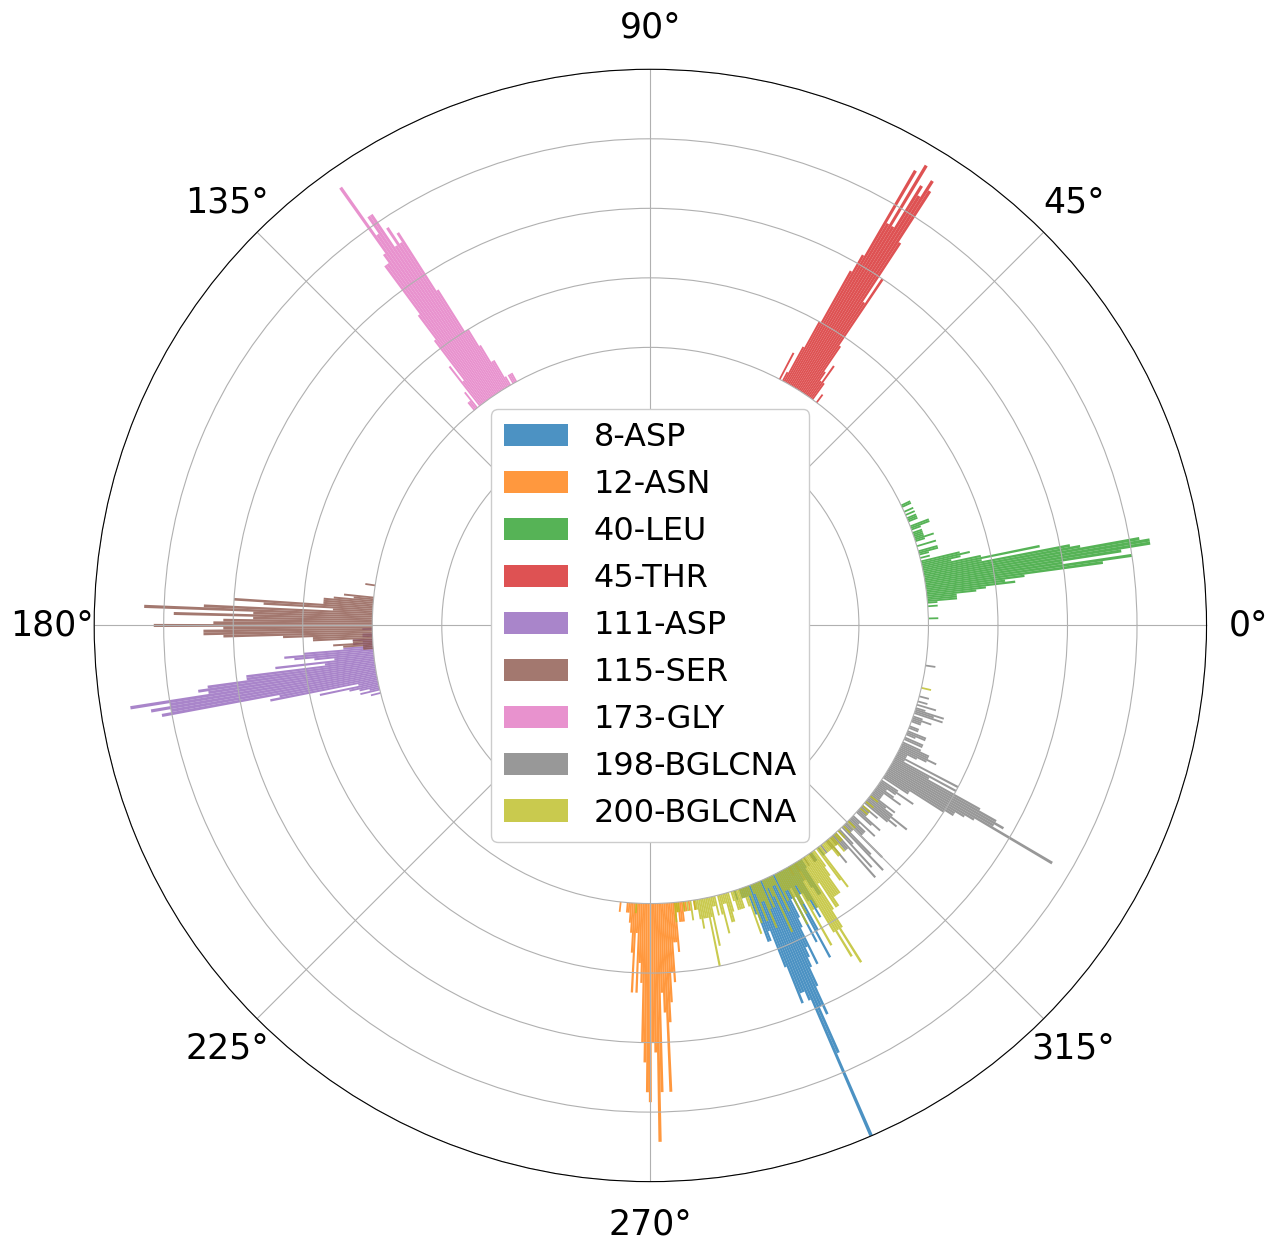

In [22]:
select_res='resid 198 200 12 8 40 45 111 115 173'
zlim=15
Nframes=300
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'polar'}, figsize=(12, 12))
hist_arr,pos_hist=ag_biopol.PolarAnalysis(select_res,Nframes=None,ax=ax, #sort=[1,2,3,4,5,6,7,8,0],
                                            zlim=zlim,control_plots=False,plot=True)
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5),framealpha=1, fontsize=23)
# ax.tick_params(axis='both', labelsize=15)  # Adjust tick labels
# Separate tick labels from the polar axis
ax.tick_params(axis='x', pad=20,labelsize=25)  # Adjust angular ticks (theta axis)
# ax.tick_params(axis='y', pad=15,labelsize=25)  # Adjust radial ticks (r axis)

plt.show()

At first sight, we can notice that glycan residues 198 and 200 show an increse of width respect to protein residues, as was expected. 

## Residue KDE contour plots

In general, for the Contour Analysis, we will want to center these contour is residues that are in contact with the surface. For this reason, we will define a new object with only residues in the contact region.


In [23]:
sel_in_Contact=u.select_atoms('resid 4-15 or resid 34-45 or resid 104-117 or resid 170-176')
Contact_region = BioPolymer2D(sel_in_Contact, surf_selection='resname DOL and name O1 and prop z > 16')
Contact_region.system_name='Contact region'# (omicron RBD)'
Contact_region.getPositions()
print(Contact_region.startF,Contact_region.endF)
print(Contact_region.pos.mean(axis=(0,1)))

Getting positions from frame 0 to 300 with steps of 1
 Mean position of the surface is [149.5         41.72882669  36.97127891  26.97194334]
Getting positions from frame 0 to 300 with steps of 1
0 300
[149.5         40.96924388  36.2414914   17.25024044]


We compute the KDE Contours using `getKDEAnalysis` with the  same `zlim` and `Nframes` values as ther polar Histograms for consistency. It will be stored in `kde_analysis.kdeanalysis.kde`.

In [ ]:
paths=Contact_region.getKDEAnalysis(15,Nframes=None,)
print(Contact_region.kdeanalysis.kde)

(300,)
There are 299  frames < 15 A in Z
(299, 45, 4)
(13455, 4)
There are 10 levels in the KDE.
Axes(0.125,0.11;0.775x0.77)


 Then we will compute the Contour plots of multiple residues using the `KDEAnalysisSelection` method to compute the Contour paths of all the residues. Before this, we use `plotPathsInLevel` to plot the paths of contour level 0 (the outermost level) as a reference of the position of our selection `sel_for_kde_analysis`. Note that if you are not interested of showing the plot, but only on computing the paths you can uncomment `plt.close()` and comment `plt.show()` 

Getting positions from frame 0 to 300 with steps of 1
[149.5         43.23445015  32.82221713  16.33342782]
(300,)
There are 289  frames < 15 A in Z
(289, 9, 4)


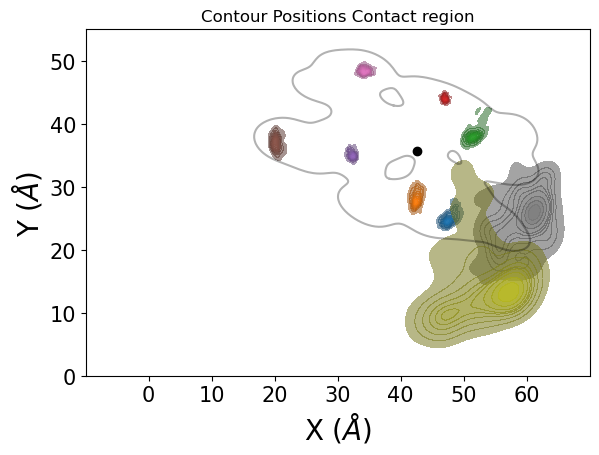

In [ ]:
fig, ax = plt.subplots(figsize=(6.5,6.5))
Contact_region.plotPathsInLevel(paths,0,show=False,ax=ax)
all_residues_paths,residues_in_contour=Contact_region.KDEAnalysisSelection('resid 198 200 12 8 40 45 111 115 173',zlim=15,Nframes=None,show=False,legend=False,ax=ax)
ax.set_ylim((0,55))
ax.set_xlim((-10,70))
ax.set_xlabel(r'X ($\AA$)',fontsize=20)
ax.set_ylabel(r'Y ($\AA$)',fontsize=20)
ax.set_xticks(range(0,70,10))
ax.tick_params(axis='both', labelsize=15)  

plt.show()
# plt.close()

It can be noted, once again, that area of the glycans residues are more larger that proteic residues. 

In order to have a more quantitative analysis, now that the KDE contour paths of the residues are computed, we can procede to  calculate their areas using `getAreas` method for each residue. As follows, we can make a table with the total area of the outermost contour level (level 0) for each residue .


In [30]:
data=[]
for p in range(len(all_residues_paths)):
    areas=BioPolymer2D.getAreas(all_residues_paths[p],0,getTotal=True)
    data.append([residues_in_contour.residues[p].resid,residues_in_contour.residues[p].resname,areas])
df=pd.DataFrame(data=data, columns=["ResIDs", "Resnames", "Area (angs^2)"])
df

Area of the outline 0: 12.650521458588537
Area of the outline 1: -7.423345108306007
Area of the outline 0: 11.634233940970237
Area of the outline 1: -7.111230876039048
Area of the outline 0: 15.565885873343753
Area of the outline 1: -7.7646469855421065
Area of the outline 2: 0.44355029528268974
Area of the outline 0: 3.100560512977867
Area of the outline 1: -1.8873444400988784
Area of the outline 2: 0.029696260304156064
Area of the outline 0: 5.482472078751481
Area of the outline 1: -3.3298037898488824
Area of the outline 0: 11.652343003485178
Area of the outline 1: -7.4714143586779675
Area of the outline 0: 5.868320533456583
Area of the outline 1: -4.326483406163316
Area of the outline 0: 219.15871624504567
Area of the outline 1: -131.6038781082297
Area of the outline 0: 353.39906605419037
Area of the outline 1: -190.5860637117225


,ResIDs,Resnames,Area (angs^2)
0,8,ASP,5.227176
1,12,ASN,4.523003
2,40,LEU,8.244789
3,45,THR,1.242912
4,111,ASP,2.152668
5,115,SER,4.180929
6,173,GLY,1.541837
7,198,BGLCNA,87.554838
8,200,BGLCNA,162.813002


These results can quantitatively confirme that KDE contour plots of the glycans have a larger area respect to the proteic residues, confirming that the glycan are indeed more flexible than the protein.

## Parallel and perpendicular radii of gyration

Now, that we have seen the flexibility of the protein and glycans, we would like to have some insights of the deformation of the protein during the adsorption. To this matter, we compute the parallel and perpendicular radii of gyration over the contact region and the glycan. We initialize the glycan object.

In [ ]:
sel_glyc=u.select_atoms("resname AFUC BMAN AMAN BGLCNA")
glycan=BioPolymer2D(sel_glyc)
glycan.getPositions()
glycan.surf_pos=Contact_region.surf_pos
glycan.pos[:,:,3]=glycan.pos[:,:,3]-glycan.surf_pos[2]
glycan.system_name="Glycan"# (omicron RBD)" 

Getting positions from frame 0 to 300 with steps of 1


We compute the radii of gyration. With `plot=True` we can see the trajectory of the Rgs over time.

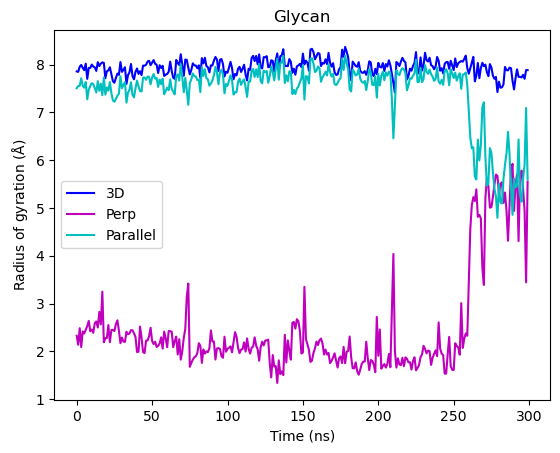

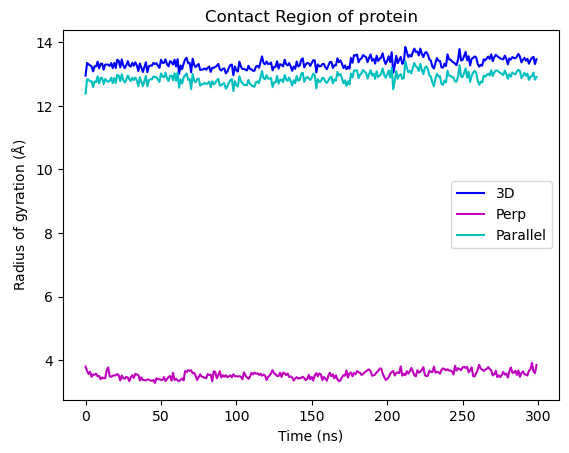

In [ ]:

rgs_glycan=glycan.getRgs2D(plot=True)
plt.title("Glycan")
plt.show()
rgs=Contact_region.getRgs2D(plot=True)
plt.title("Contact Region of protein")
plt.show()



Here, we can clearly notice that the protein did not change much its adsorption or deformation, but in the glycan we could notice that there was a change in the adsorption. Was the glycan deformed or did the the protein "fly away" from the surface. As a first insight we could hipotesize the second, since it reached a globular-like radius of gyration. But further analysis would be required to be sure.  **Note that by using the standard 3D Rgs, the glycans would not notice any diference in the last nanosecond of the trajectory**.

Now we wan to see how these values correlate with:

(300, 2)
(300, 2)


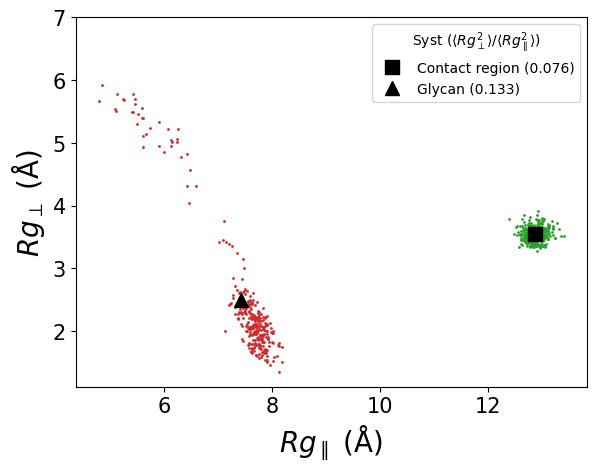

In [33]:
fig, ax = plt.subplots(figsize=(6.6,4.8))
# print(rgs.shape)
ratio=Contact_region.RgPerpvsRgsPar(rgs, 'tab:green',show=False,ax=ax,legend=False,)
ratio_glycan=glycan.RgPerpvsRgsPar(rgs_glycan,'tab:red',marker='^', show=False,ax=ax,legend=True)
#ax.legend(title=r'Syst ($\langle Rg_\perp^2\rangle /\langle Rg_\parallel^2 \rangle$)', title_fontsize=15,fontsize=15)
ax.set_xlabel(r'$Rg_\parallel$ ($\mathrm{\AA}$)',fontsize=20)
ax.set_ylabel(r'$Rg_\perp$ ($\mathrm{\AA}$)',fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticks(range(2,8))

Here we can notice a squeeze-streching dynamic of the glycan (as seen in the trajectory plot), while the protein does not show much changes. Note that the plot also shows the $\langle R_{g\perp}^2 \rangle/\langle R_{g\parallel}^2 \rangle$ value in the legend, which are also returned by the `RgPerpvsRgsPar` method.

In [34]:
print(ratio)
print(ratio_glycan)

0.07573212247468661
0.13253417119439223


## H-bonds per residues

To have some insight fo the interactions of the residues with the surface we will compute the h-bonds of:
1. Glycan with PBL
2. Protein+glycan with PBL
3. Glycan with Protein 

#### 1. Glycan with PBL

We will compute the Glycan residues that has more H-bonds with the PBL computing `getHbonds` and plot them with a referencial contour plot with `plotHbondsPerResidues`. Note that `getHbonds` will compute Hbonds from both the PBL and the glycan, and, in general, we would like to see the top residues with most Hbonds of the biopolymer rather than the residues in the  surface. To this matter, can list the residue names that we **do not** want plotted and listed with the `filter` parameter.

**NOTE:** `update_selections` parameter overwrites the homonimous parameter of the `HydrogenBondAnalysis` method MDAnalysis package. It is set `False` for the notebook, to reduce calculation time but it is set `True` by default, and is suggested to use with this default option. 

  0%|          | 0/300 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4)).
  warnings.warn(


(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 8, 4)
(2400, 4)
There are 10 levels in the KDE.
(3, 742) (742, 2) resid result
     Frame  Hydrogens  Acceptors
0        0        197        423
1        0        199        386
2        0        369        195
3        0        403        199
4        1        197        423
..     ...        ...        ...
737    289        200        388
738    290        705        200
739    292        200        371
740    292        200        370
741    292        352        200

[742 rows x 3 columns]
(3, 742) (742, 2) resid result
     Frame  Hydrogens  Acceptors
0        0        197        423
1        0        199        386
2        0        369        195
3        0        403        199
4        1        197        423
..     ...        ...        ...
660    288        370        200
661    289        200        388
662    290        705        200
663    292        200        371
664    292        35

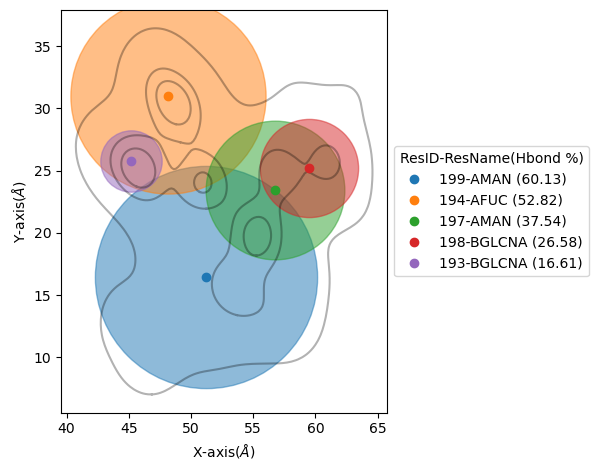

In [ ]:
ag_biopol.getHbonds('resname DOL','resid 193-200', update_selections=False,trj_plot=False)

fig, ax = plt.subplots()
paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=5, print_table=True,filter=['DOL'],ax=ax)
plt.show()

As an output of `plotHbondsPerResidues`we also get a table with all the residues (with the filter applied) with most Hbonds with their corresponding Hbond count, and their mean center of mass position.

#### 2. Protein+glycan with PBL

Again, we only want to filter the PBL residues, and wil compute the H-bonds of the Protein+Glycan (the whole Biopolymer onto the surface). But now we want to see referential contours of the 2 regions of interest separetly, the protein and the glycan, so this time we concatenate the lists of paths of both of them with the `+` operator and select to plot path 0 (the proteins Contour) and path 9 (first glycan contour), remembering that the contour had only 9 paths, therfore indexed from 0-8. Contour of the protein is marked in black, and contour of the glycan is marked in red.

(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 45, 4)
(13500, 4)
There are 10 levels in the KDE.
(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 8, 4)
(2400, 4)
There are 10 levels in the KDE.


  0%|          | 0/300 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname ALA and name O) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4) or (resname CYS and name O) or (resname GLN 

(3, 1049) (1049, 2) resid result
      Frame  Hydrogens  Acceptors
0         0         41        705
1         0        108        335
2         0        109        633
3         0        197        423
4         0        199        386
...     ...        ...        ...
1044    289        200        388
1045    290        705        200
1046    292        200        371
1047    292        200        370
1048    292        352        200

[1049 rows x 3 columns]
(3, 1049) (1049, 2) resid result
     Frame  Hydrogens  Acceptors
0        0         41        705
1        0        108        335
2        0        109        633
3        0        197        423
4        0        199        386
..     ...        ...        ...
910    288        370        200
911    289        200        388
912    290        705        200
913    292        200        371
914    292        352        200

[915 rows x 3 columns]
Index([38, 40, 107, 108, 167, 192, 193, 194, 195, 196, 197, 198, 199], dtype='int

,ResIDs,ResNames,Count,X,Y,Z
11,199,AMAN,181.0,51.213207,16.478509,38.114720
6,194,AFUC,159.0,48.166904,31.012923,39.595079
3,109,LYS,120.0,32.362098,38.177964,37.903129
9,197,AMAN,113.0,56.717737,23.472184,38.986249
0,39,ASN,83.0,56.469901,37.511772,38.590510
10,198,BGLCNA,80.0,59.473793,25.240245,40.236673
5,193,BGLCNA,50.0,45.188766,25.747239,39.990471
12,200,BGLCNA,49.0,53.672949,14.059868,40.434110
1,41,ALA,39.0,50.413655,41.867620,38.657335
7,195,BGLCNA,19.0,49.905828,24.168591,39.757824


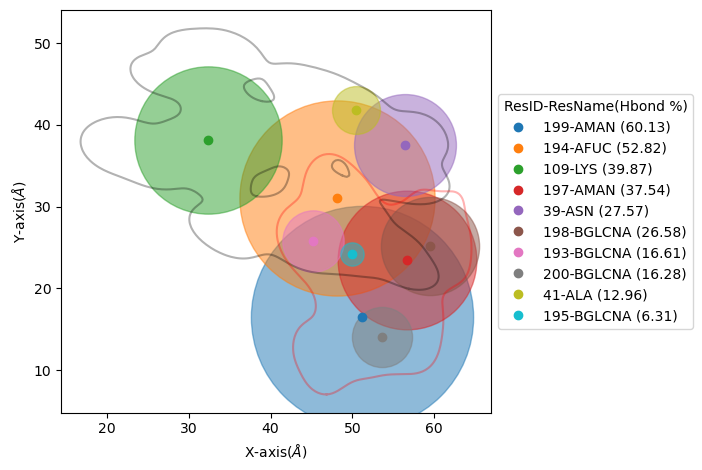

In [ ]:
paths=Contact_region.getKDEAnalysis(zlim,Nframes)+glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.getHbonds('resname DOL','resid 193-200 or protein', update_selections=False,trj_plot=False)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,9],contour_colors=['k','r'],top=10, print_table=True,)

It can be clearly noted that the glycan is the main character in the adsorption.

#### 3. Glycan with Protein 

Now, to further understand the Glycans influence over the proteins dynamics we can compute the Hbonds between the glycan and the protein. 

(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 8, 4)
(2400, 4)
There are 10 levels in the KDE.


  0%|          | 0/300 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname ALA and name O) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname CYS and name O) or (resname GLN and name NE2) or (resname GLN and name O) or (resname GLN and name OE1) or (resname GLU and name O) or (resname GLU and name OE1) or (resname GLU and name OE2) or (resname GLY and name O) or (resname HSE and name ND1) or (resname HSE and name O) or (resname ILE and name O) or (resname LEU and name O) or (resname LYS and name O) or (resname PHE and name O) or (resname PRO and name O) or (resname 

(3, 216) (216, 2) resid result
     Frame  Hydrogens  Acceptors
0        0         57        198
1        0        197         35
2        1        197         35
3        1        198         33
4        2          4        200
..     ...        ...        ...
211    286        198         35
212    290        198         35
213    291        105        194
214    296        198         35
215    299        198         40

[216 rows x 3 columns]
(3, 216) (216, 2) resid result
     Frame  Hydrogens  Acceptors
0        0         57        198
1        0        197         35
2        1        197         35
3        1        198         33
4        2          4        200
..     ...        ...        ...
197    286        198         35
198    290        198         35
199    291        105        194
200    296        198         35
201    299        198         40

[202 rows x 3 columns]
Index([  1,   2,   3,   7,   8,  10,  11,  30,  31,  32,  34,  38,  39,  56,
       104, 192, 193,

,ResIDs,ResNames,Count,X,Y,Z
9,33,ASP,97.0,57.505415,29.523484,45.484671
18,197,AMAN,84.0,56.717737,23.472184,38.986249
19,198,BGLCNA,53.0,59.473793,25.240245,40.236673
10,35,SER,22.0,57.925215,33.276242,42.282061
3,8,ASP,21.0,47.805180,25.046372,44.777433
21,200,BGLCNA,20.0,53.672949,14.059868,40.434110
17,195,BGLCNA,19.0,49.905828,24.168591,39.757824
15,193,BGLCNA,15.0,45.188766,25.747239,39.990471
6,12,ASN,14.0,42.514150,28.194653,42.600810
16,194,AFUC,9.0,48.166904,31.012923,39.595079


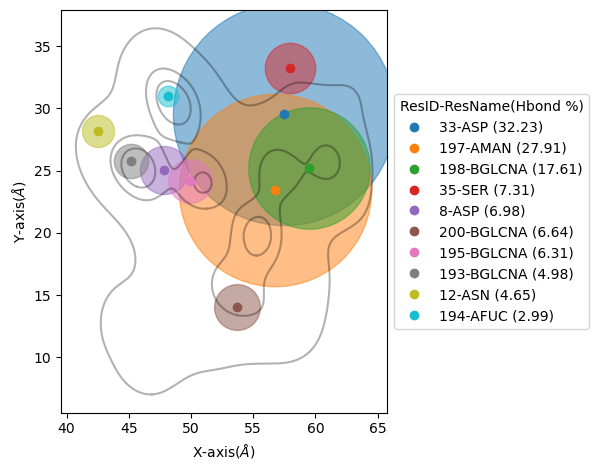

In [37]:

paths=glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.getHbonds('protein','resid 193-200', update_selections=False,trj_plot=False)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8],top=10, print_table=True)

In [ ]:
biopol_selection='protein or resname AFUC BMAN AMAN BGLCNA' # Selection of protein and its glycan
surf_selection='resname DOL' # Selection of atoms present in the surfaces
ag_biopol.getHbonds(surf_selection,biopol_selection)

  0%|          | 0/300 [00:00<?, ?it/s]

/home/antonio/Programs/miniconda3/envs/twod-analysis-kit/lib/python3.12/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:774: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, ((resname DOL and name O1)) or ((resname AFUC and name O2) or (resname AFUC and name O3) or (resname AFUC and name O4) or (resname ALA and name O) or (resname AMAN and name O3) or (resname AMAN and name O4) or (resname AMAN and name O6) or (resname ARG and name NE) or (resname ARG and name NH1) or (resname ARG and name NH2) or (resname ARG and name O) or (resname ASN and name ND2) or (resname ASN and name O) or (resname ASN and name OD1) or (resname ASP and name O) or (resname ASP and name OD1) or (resname ASP and name OD2) or (resname BGLCNA and name O) or (resname BGLCNA and name O3) or (resname BGLCNA and name O4) or (resname BGLCNA and name O6) or (resname BMAN and name O2) or (resname BMAN and name O4) or (resname CYS and name O) or (resname GLN 

{'hbonds': array([[0.00000000e+00, 6.45000000e+02, 6.46000000e+02, 1.98900000e+04,
        2.98805839e+00, 1.62037548e+02],
       [0.00000000e+00, 1.67500000e+03, 1.67600000e+03, 7.68000000e+03,
        2.95611353e+00, 1.59076848e+02],
       [0.00000000e+00, 1.69600000e+03, 1.69700000e+03, 1.75140000e+04,
        2.85639824e+00, 1.57715823e+02],
       ...,
       [2.92000000e+02, 3.21600000e+03, 3.21700000e+03, 8.86800000e+03,
        2.89987819e+00, 1.65814225e+02],
       [2.92000000e+02, 3.22000000e+03, 3.22100000e+03, 8.83500000e+03,
        2.90210027e+00, 1.55154487e+02],
       [2.92000000e+02, 8.24100000e+03, 8.24200000e+03, 3.21600000e+03,
        2.73250705e+00, 1.56223784e+02]], shape=(1049, 6))}

(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 45, 4)
(13500, 4)
There are 10 levels in the KDE.
(300,)
There are 300  frames < 15 A in Z
Taking 300 closest frames to surface...
(300, 8, 4)
(2400, 4)
There are 10 levels in the KDE.
(3, 1049) (1049, 2) resid result
      Frame  Hydrogens  Acceptors
0         0         41        705
1         0        108        335
2         0        109        633
3         0        197        423
4         0        199        386
...     ...        ...        ...
1044    289        200        388
1045    290        705        200
1046    292        200        371
1047    292        200        370
1048    292        352        200

[1049 rows x 3 columns]
(3, 1049) (1049, 2) resid result
     Frame  Hydrogens  Acceptors
0        0         41        705
1        0        108        335
2        0        109        633
3        0        197        423
4        0        199        386
..     ...        ...        ..

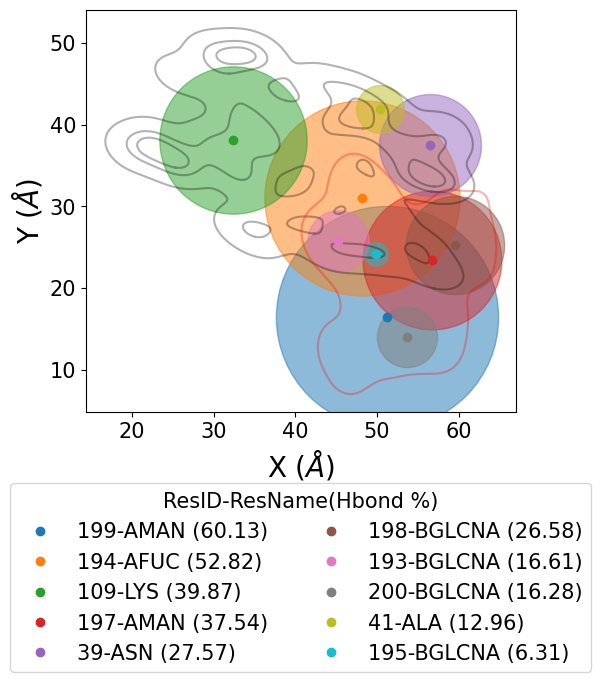

In [39]:
fig, ax = plt.subplots()
paths=Contact_region.getKDEAnalysis(zlim,Nframes)+glycan.getKDEAnalysis(zlim,Nframes)
ag_biopol.plotHbondsPerResidues(paths,contour_lvls_to_plot=[0,5,8,9],contour_colors=['k']*3+['r'],top=10, print_table=True,filter=['DOL'],ax=ax)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),#prop={'size':22},
#                     title="ResID-ResName(Hbond %)",)#title_fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),title="ResID-ResName(Hbond %)",
          ncol=2,fontsize=15, title_fontsize=15)
        #   fancybox=True, shadow=True, ncol=5)
ax.set_xlabel(r'X ($\AA$)',fontsize=20)
ax.set_ylabel(r'Y ($\AA$)',fontsize=20)
ax.tick_params(axis='both', labelsize=15)  
        
plt.show()